In [1]:
packages = ['numpy', 'pandas', 'warnings', 'sqlite3', 'sqlite3', 'matplotlib', 'seaborn']

for package in packages:
    try:
        __import__(package)
    except ImportError:
        %!pip3 install {package}

import numpy as np                  # For numerical computing
import pandas as pd                 # For data manipulation
import matplotlib.pyplot as plt     # For plotting graphs
import seaborn as sns               # For plotting
import os

### Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

## Extracting the data

I extract the data for fama-french factors

In [2]:
df = pd.read_csv('data/Fama_French_daily_data_5_factors.csv', index_col=0)
df

,MKT,SMB,HML,RMW,CMA
1963-07-01,-0.0067,0.0002,-0.0035,0.0003,0.0013
1963-07-02,0.0079,-0.0028,0.0028,-0.0008,-0.0021
1963-07-03,0.0063,-0.0018,-0.0010,0.0013,-0.0025
1963-07-05,0.0040,0.0009,-0.0028,0.0007,-0.0030
1963-07-08,-0.0063,0.0007,-0.0020,-0.0027,0.0006
...,...,...,...,...,...
2024-12-24,0.0111,-0.0012,-0.0005,-0.0013,-0.0037
2024-12-26,0.0002,0.0109,-0.0019,-0.0044,0.0035
2024-12-27,-0.0117,-0.0044,0.0056,0.0041,0.0003
2024-12-30,-0.0109,0.0024,0.0074,0.0055,0.0014


In [3]:
factor_ret_d = df.copy()

In [4]:
factor_ret_d.index = pd.to_datetime(factor_ret_d.index)

## Sumarizing data in table

I make summary of the daily factor data

In [5]:
table2 = pd.DataFrame(index = ['MKT', 'SMB', 'HML', 'RMW', 'CMA'],
                      columns = ['Mean in % ann.', 'Volatility in % ann.', 'Max', 'Min'])

table2.loc[:,'Mean in % ann.'] = df.mean()*100*252

table2.loc[:,'Volatility in % ann.'] = df.std()*100*np.sqrt(252)

table2.loc[:,'Max'] = df.max()

table2.loc[:,'Min'] = df.min()

## Looking at volatility relationship

Then I look at volatility for each day and month for the faily factor data

In [6]:
factor_ret_m = pd.read_csv('data/Fama_French_monthly_data_5_factors.csv', index_col=0)
factor_ret_m.index = pd.to_datetime(factor_ret_m.index)

In [7]:
### Getting the daily volatilites we are missing using the daily returns
volatility = pd.DataFrame(index=factor_ret_m.index, columns=factor_ret_m.columns)

# find for each date in monthly observations all days that have the same month and year. Then find std
for factor in factor_ret_m.columns:
    for date in factor_ret_m.index:
        volatility.loc[date, factor] = (factor_ret_d.loc[(factor_ret_d.index.month == date.month) & (factor_ret_d.index.year == date.year), factor]**2).resample('M').sum().values[0]

## Add log of EPU index information to volatility table

In [8]:
epu = pd.read_csv('data/US_Policy_Uncertainty_Data.csv')
epu.index = pd.to_datetime(epu.Date)
epu = epu.drop(columns = ['Date'])
epu.index = epu.index + pd.DateOffset(days = -1)
volatility['EPU'] = np.log(epu['News_Based_Policy_Uncert_Index'])
volatility

,MKT,SMB,HML,RMW,CMA,EPU
1963-07-31,0.00047,0.000045,0.000084,0.000048,0.000074,3.734101
1963-08-31,0.000295,0.000073,0.000096,0.000028,0.000049,3.851376
1963-09-30,0.000305,0.000107,0.000072,0.000058,0.000054,3.538365
1963-10-31,0.000418,0.000172,0.000251,0.000161,0.000193,3.672443
1963-11-30,0.003057,0.000364,0.000168,0.00014,0.000133,3.905279
...,...,...,...,...,...,...
2024-08-31,0.003544,0.001359,0.001009,0.000576,0.000691,4.847325
2024-09-30,0.001596,0.000944,0.00098,0.000324,0.000281,4.694013
2024-10-31,0.001091,0.000998,0.000938,0.000405,0.000281,5.416318
2024-11-30,0.001577,0.00194,0.00309,0.000486,0.000478,5.388366


Make terciles based on the volatility data

## Draw the log of EPU indicator and EPU indicator

In [9]:
epu = pd.read_csv('data/US_Policy_Uncertainty_Data.csv')
epu.index = pd.to_datetime(epu.Date)
epu = epu.drop(columns = ['Date'])
epu.index = epu.index + pd.DateOffset(days = -1)
volatility['EPU'] = np.log(epu['News_Based_Policy_Uncert_Index'])
volatility

,MKT,SMB,HML,RMW,CMA,EPU
1963-07-31,0.00047,0.000045,0.000084,0.000048,0.000074,3.734101
1963-08-31,0.000295,0.000073,0.000096,0.000028,0.000049,3.851376
1963-09-30,0.000305,0.000107,0.000072,0.000058,0.000054,3.538365
1963-10-31,0.000418,0.000172,0.000251,0.000161,0.000193,3.672443
1963-11-30,0.003057,0.000364,0.000168,0.00014,0.000133,3.905279
...,...,...,...,...,...,...
2024-08-31,0.003544,0.001359,0.001009,0.000576,0.000691,4.847325
2024-09-30,0.001596,0.000944,0.00098,0.000324,0.000281,4.694013
2024-10-31,0.001091,0.000998,0.000938,0.000405,0.000281,5.416318
2024-11-30,0.001577,0.00194,0.00309,0.000486,0.000478,5.388366


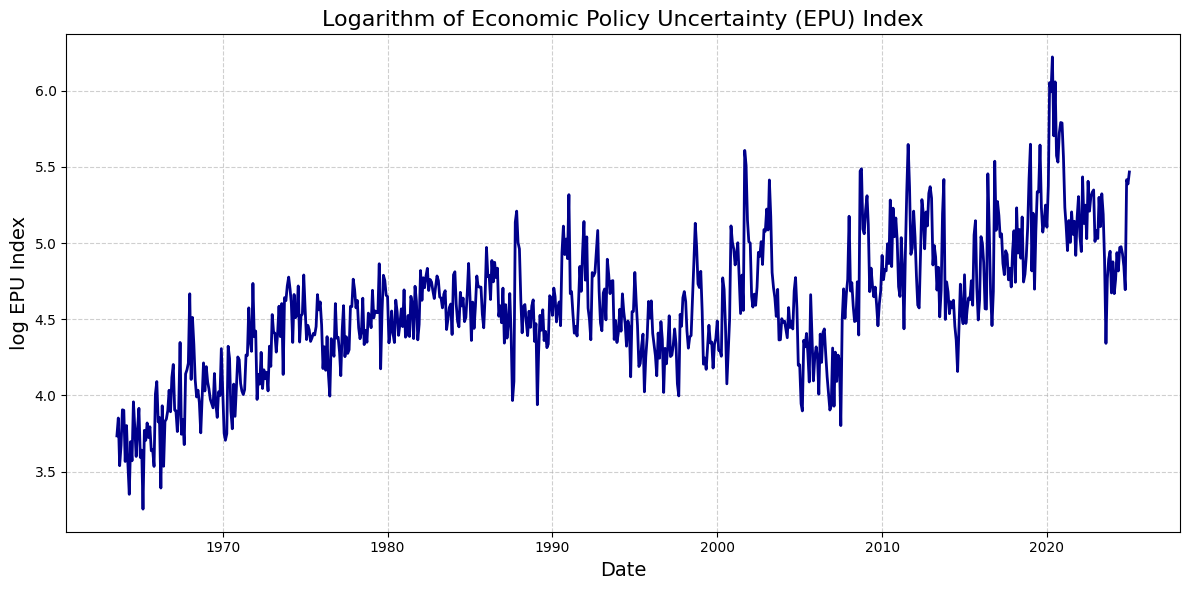

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Larger figure
plt.plot(volatility.EPU, color = 'darkblue', linewidth=2)
plt.title('Logarithm of Economic Policy Uncertainty (EPU) Index', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('log EPU Index', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# Save figure before showing
plt.savefig("02_graphs/log_EPU_indicator_US.png", dpi=300, bbox_inches="tight")
plt.show()

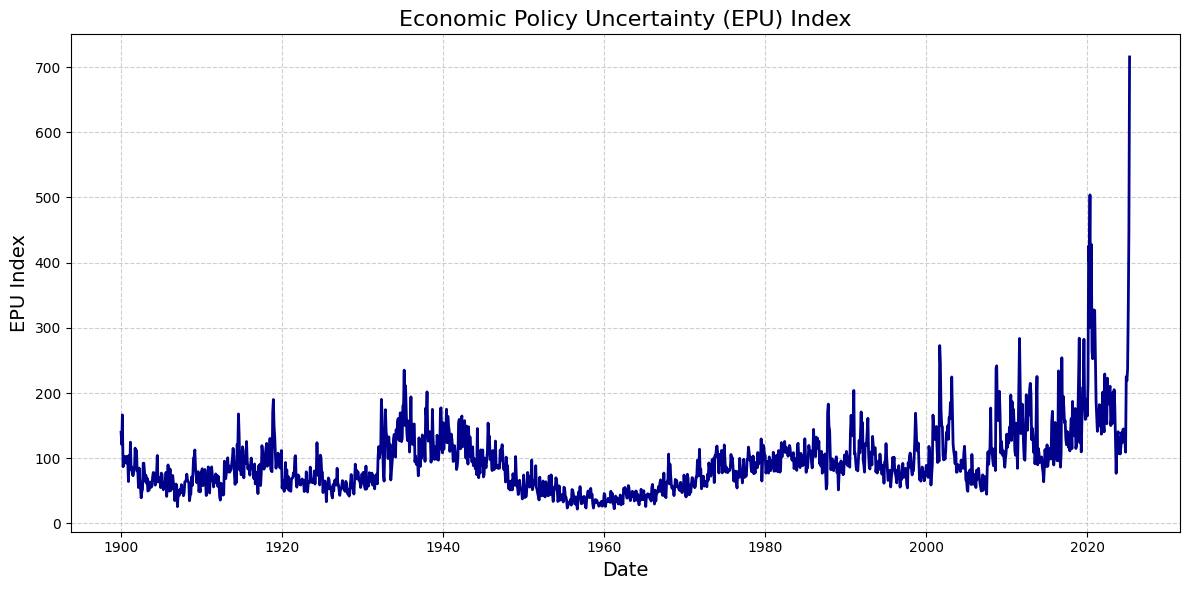

In [11]:
epu_pure = pd.read_csv('data/US_Policy_Uncertainty_Data.csv')
epu_pure.index = pd.to_datetime(epu_pure.Date)
epu_pure = epu_pure.drop(columns = ['Date'])
epu_pure.index = epu_pure.index + pd.DateOffset(days = -1)

plt.figure(figsize=(12, 6))  # Larger figure
plt.plot(epu_pure, color = 'darkblue', linewidth=2)
plt.title('Economic Policy Uncertainty (EPU) Index', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('EPU Index', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("02_graphs/EPU_indicator_US.png", dpi=300, bbox_inches="tight")
plt.show()

## Draw the buckets

I create treciles based on quantiles of the sentiment indicator. Then for each observation for each factor at each date I mark the observation according to trecile it is at by words 'Low', 'Medium', 'High' indicating treciles.

In [12]:
### Categorising the volatility as low, medium, high
terciles = volatility.quantile([1/3, 2/3])

### Getting a new dataframe with the volatility categorised
volatility_cat = pd.DataFrame(index=volatility.index, columns=volatility.columns)
for factor in volatility.columns:
    for date in volatility.index:
        if volatility.loc[date, factor] <= terciles.loc[1/3, factor]:
            volatility_cat.loc[date, factor] = 'Low'
        elif volatility.loc[date, factor] <= terciles.loc[2/3, factor]:
            volatility_cat.loc[date, factor] = 'Medium'
        else:
            volatility_cat.loc[date, factor] = 'High'

print(volatility_cat)

               MKT     SMB     HML     RMW     CMA     EPU
1963-07-31     Low     Low     Low     Low     Low     Low
1963-08-31     Low     Low     Low     Low     Low     Low
1963-09-30     Low     Low     Low     Low     Low     Low
1963-10-31     Low     Low  Medium  Medium  Medium     Low
1963-11-30    High  Medium     Low  Medium  Medium     Low
...            ...     ...     ...     ...     ...     ...
2024-08-31    High    High    High    High    High    High
2024-09-30  Medium    High    High    High    High  Medium
2024-10-31  Medium    High    High    High    High    High
2024-11-30  Medium    High    High    High    High    High
2024-12-31    High    High    High    High    High    High

[738 rows x 6 columns]


Then I calculate risk-return tradeoff (sharpe ratio) by dividing factor return by volatiity of factors.

I create plot_df dataset that contains observations of mean sharpe ratios for each factor by treciles. I use treciles split based on volatility of the market and of the EPU indicator

In [13]:
### Getting the monthly sharpe ratios
sharpe_ratios = (factor_ret_m * 12) / volatility

### Restricting the plot_df to the period of our volatility-timed data
sharpe_ratios = sharpe_ratios.loc['1993':]
volatility_cat = volatility_cat.loc['1993':]

### Creating a dataframe for the plot
plot_df = pd.DataFrame(columns=volatility_cat.columns)
plot_df.loc['low (using EPU)',] = sharpe_ratios[volatility_cat['EPU'].shift(1) == 'Low'].mean()
plot_df.loc['medium (using EPU)',] = sharpe_ratios[volatility_cat['EPU'].shift(1) == 'Medium'].mean()
plot_df.loc['high (using EPU)',] = sharpe_ratios[volatility_cat['EPU'].shift(1) == 'High'].mean()

plot_df.loc['low (using market vol)'] = sharpe_ratios[volatility_cat['MKT'].shift(1) == 'Low'].mean()
plot_df.loc['medium (using market vol)'] = sharpe_ratios[volatility_cat['MKT'].shift(1) == 'Medium'].mean()
plot_df.loc['high (using market vol)'] = sharpe_ratios[volatility_cat['MKT'].shift(1) == 'High'].mean()

In [14]:
plot_df

,MKT,SMB,HML,RMW,CMA,EPU
low (using EPU),29.232689,-19.596521,61.120163,78.049094,27.232062,NaN
medium (using EPU),24.371112,-19.343346,-4.854924,6.125649,-17.546598,NaN
high (using EPU),26.233355,-1.647983,14.514897,-17.089468,16.11634,NaN
low (using market vol),25.246044,-25.952824,54.367897,-0.818206,24.18177,NaN
medium (using market vol),27.484831,1.927358,9.949174,22.422686,15.31267,NaN
high (using market vol),26.146283,-10.008821,3.233335,6.632909,-5.328491,NaN


In [15]:
plot_df = plot_df.drop(columns = ['EPU'])

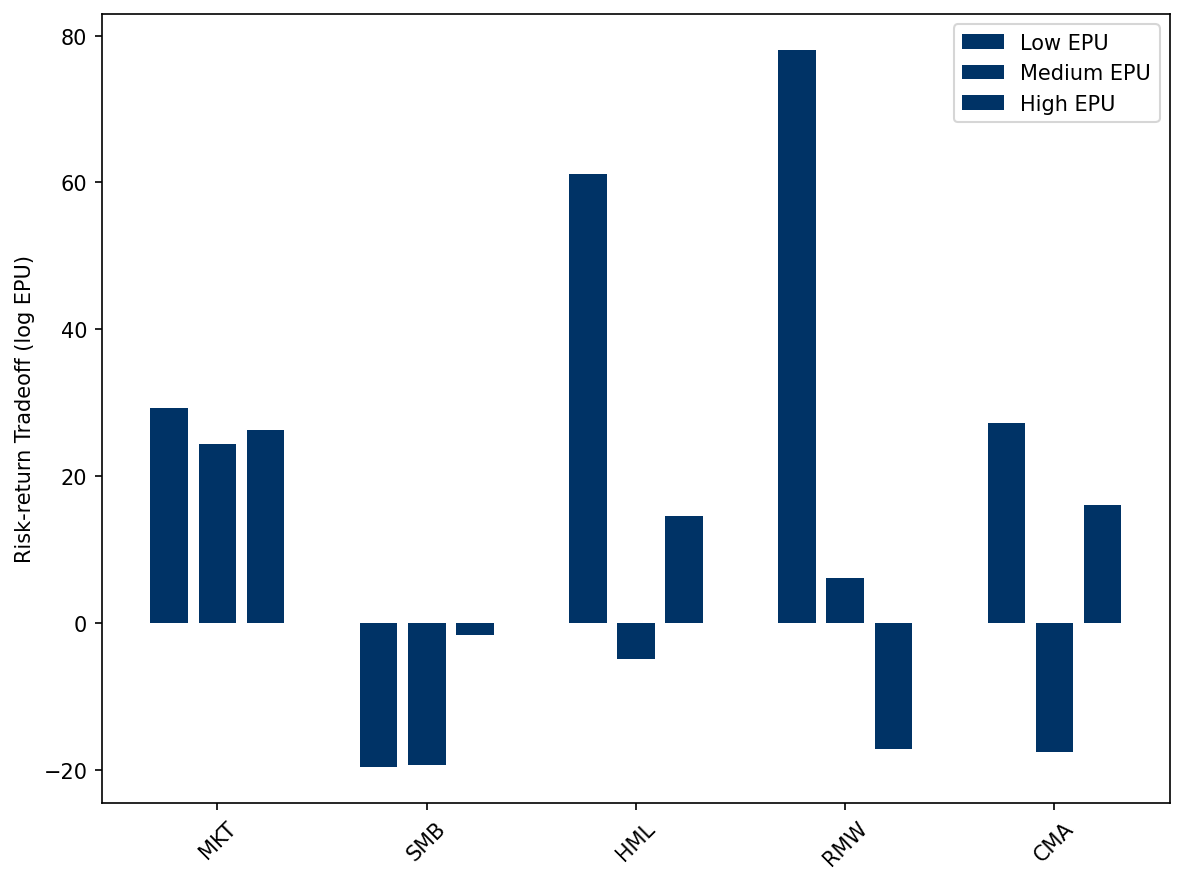

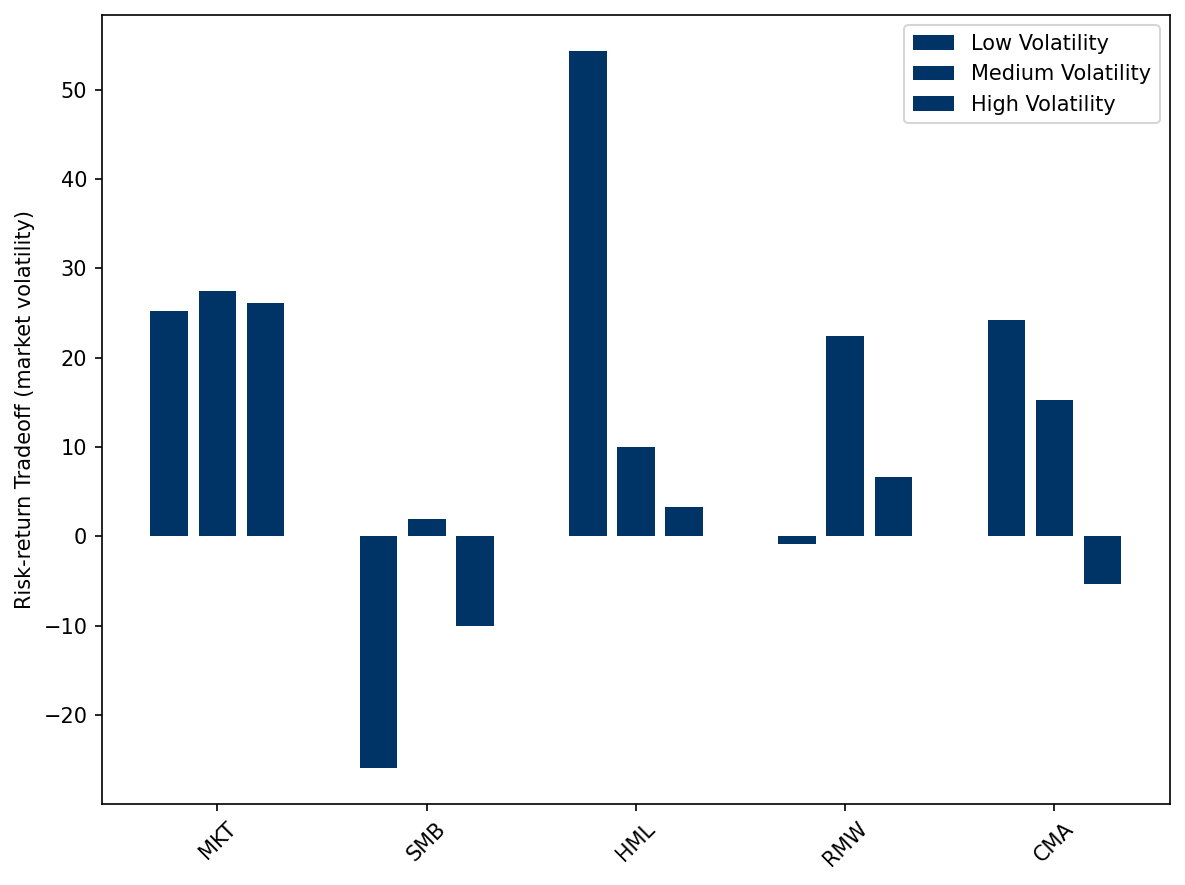

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Config
bar_width = 0.18
gap = 0.05
group_width = 3 * bar_width + 2 * gap
x = np.arange(len(plot_df.columns))
dark_blue = '#003366'

# --- Plot 1: Using EPU ---
fig1, ax1 = plt.subplots(figsize=(8, 6), dpi=150)
ax1.bar(x - group_width / 2 + bar_width / 2, plot_df.loc['low (using EPU)'],
        width=bar_width, label='Low EPU', color=dark_blue)
ax1.bar(x - group_width / 2 + 3 * bar_width / 2 + gap, plot_df.loc['medium (using EPU)'],
        width=bar_width, label='Medium EPU', color=dark_blue)
ax1.bar(x - group_width / 2 + 5 * bar_width / 2 + 2 * gap, plot_df.loc['high (using EPU)'],
        width=bar_width, label='High EPU', color=dark_blue)

ax1.set_ylabel('Risk-return Tradeoff (log EPU)')
ax1.set_xticks(x)
ax1.set_xticklabels(plot_df.columns, rotation=45)
ax1.legend(loc='upper right')

plt.tight_layout()
plt.savefig("02_graphs/EPU-based buckets.png", dpi=300, bbox_inches="tight")

# --- Plot 2: Using Market Volatility ---
fig2, ax2 = plt.subplots(figsize=(8, 6), dpi=150)
ax2.bar(x - group_width / 2 + bar_width / 2, plot_df.loc['low (using market vol)'],
        width=bar_width, label='Low Volatility', color=dark_blue)
ax2.bar(x - group_width / 2 + 3 * bar_width / 2 + gap, plot_df.loc['medium (using market vol)'],
        width=bar_width, label='Medium Volatility', color=dark_blue)
ax2.bar(x - group_width / 2 + 5 * bar_width / 2 + 2 * gap, plot_df.loc['high (using market vol)'],
        width=bar_width, label='High Volatility', color=dark_blue)

ax2.set_ylabel('Risk-return Tradeoff (market volatility)')
ax2.set_xticks(x)
ax2.set_xticklabels(plot_df.columns, rotation=45)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig("02_graphs/Volatility-based buckets.png", dpi=300, bbox_inches="tight")
plt.show()
